In [1]:
import pandas as pd
import numpy as np
import random
from preprocess_with_packet_flow_no_load import process_df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


normal_df = pd.read_csv('data/normal1.csv')
attack_df = pd.read_csv('data/attack1.csv')
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']

In [2]:
normal_df['class'] = 0
nmap_df['class'] = 1
supervised_df = pd.concat([normal_df,nmap_df], axis = 0, ignore_index=True)

/var/folders/x4/thfll6l51jv22hkn1948hhgh0000gn/T/ipykernel_21751/1077430313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nmap_df['class'] = 1


In [3]:
supervised_df

,length,timestamp,eth.src,eth.dst,eth.type,ip.src,ip.dst,ip.version,ip.proto,ip.len,...,load_14,load_15,load_16,load_17,load_18,load_19,protocol,protocol.sport,protocol.dport,class
0,144,1.647531e+09,6a:77:c0:85:72:c3,ce:4c:77:6b:35:fc,2048,10.244.0.15,10.244.0.14,4,6,130,...,4,12,4,5,4,3,TCP,52866,3306,0
1,144,1.647531e+09,ba:c6:5f:04:4f:62,ce:4c:77:6b:35:fc,2048,10.244.0.15,10.244.0.14,4,6,130,...,4,12,4,5,4,3,TCP,52866,3306,0
2,66,1.647531e+09,ce:4c:77:6b:35:fc,6a:77:c0:85:72:c3,2048,10.244.0.14,10.244.0.15,4,6,52,...,0,0,0,0,0,0,TCP,3306,52866,0
3,78,1.647531e+09,ce:4c:77:6b:35:fc,6a:77:c0:85:72:c3,2048,10.244.0.14,10.244.0.15,4,6,64,...,0,0,0,0,0,0,TCP,3306,52866,0
4,186,1.647531e+09,ce:4c:77:6b:35:fc,6a:77:c0:85:72:c3,2048,10.244.0.14,10.244.0.15,4,6,172,...,0,0,0,2,0,3,TCP,3306,52866,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182357,66,1.647534e+09,6a:77:c0:85:72:c3,ba:c6:5f:04:4f:62,2048,10.244.0.15,89.100.107.148,4,6,52,...,0,0,0,0,0,0,TCP,8080,42152,1
182358,581,1.647534e+09,6a:77:c0:85:72:c3,ba:c6:5f:04:4f:62,2048,10.244.0.15,89.100.107.148,4,6,567,...,3,1,2,0,3,2,TCP,8080,42248,1
182359,66,1.647534e+09,6a:77:c0:85:72:c3,ba:c6:5f:04:4f:62,2048,10.244.0.15,89.100.107.148,4,6,52,...,0,0,0,0,0,0,TCP,8080,42248,1
182360,581,1.647534e+09,6a:77:c0:85:72:c3,ba:c6:5f:04:4f:62,2048,10.244.0.15,89.100.107.148,4,6,567,...,3,1,2,0,3,2,TCP,8080,42106,1


In [4]:
processed_supervised = process_df(supervised_df)

In [5]:
processed_supervised['class'] = list(supervised_df['class'])

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(processed_supervised, processed_supervised["class"]):
        strat_train_set = processed_supervised.loc[train_index]
        strat_test_set = processed_supervised.loc[test_index]

In [13]:
train_set = strat_train_set.drop("class", axis=1)
labels = strat_train_set['class'].copy()

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(24, input_dim=train_set.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_set, labels, epochs=10, batch_size=64)

Epoch 1/10
  22/2280 [..............................] - ETA: 11s - loss: 0.5506 - accuracy: 0.7351

2022-03-19 14:30:38.247110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2280/2280 [==============================] - 10s 4ms/step - loss: 0.0429 - accuracy: 0.9847
Epoch 2/10
2280/2280 [==============================] - 10s 4ms/step - loss: 0.0084 - accuracy: 0.9980
Epoch 3/10
2280/2280 [==============================] - 10s 4ms/step - loss: 0.0069 - accuracy: 0.9985
Epoch 4/10
2280/2280 [==============================] - 10s 5ms/step - loss: 0.0063 - accuracy: 0.9988
Epoch 5/10
2280/2280 [==============================] - 10s 4ms/step - loss: 0.0060 - accuracy: 0.9989
Epoch 6/10
2280/2280 [==============================] - 10s 5ms/step - loss: 0.0059 - accuracy: 0.9989
Epoch 7/10
2280/2280 [==============================] - 10s 5ms/step - loss: 0.0057 - accuracy: 0.9989
Epoch 8/10
2280/2280 [==============================] - 11s 5ms/step - loss: 0.0056 - accuracy: 0.9989
Epoch 9/10
2280/2280 [==============================] - 10s 5ms/step - loss: 0.0055 - accuracy: 0.9989
Epoch 10/10
2280/2280 [==============================] - 10s 4ms/step - loss: 0.0056

In [21]:
model.save("supervised_1")

INFO:tensorflow:Assets written to: supervised_1/assets


2022-03-19 14:34:22.002054: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [22]:
test_set = strat_test_set.drop("class", axis=1)
labels_test = strat_test_set['class'].copy()



2022-03-19 14:41:07.723238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [25]:
# pred = (model.predict(test_set) > 0.5).astype(int)

In [30]:
results = model.evaluate(test_set, labels_test)
print("test loss, test acc:", results)

1140/1140 [==============================] - 4s 3ms/step - loss: 0.0070 - accuracy: 0.9986
test loss, test acc: [0.007030581124126911, 0.9986291527748108]


In [31]:
processed_attack = process_df(attack_df)

In [33]:
prediction = model.predict(processed_attack.values)

In [35]:
attack_df['prediction'] = prediction

In [38]:
attack_df['predicted_class'] = attack_df['prediction'].apply(lambda x: 1 if (x > 0.5) else 0) 

In [45]:
attack_df['actual_labels'] = attack_df["ip.dst"].apply(lambda x : 1 if x=='89.100.107.148' else 0)

In [48]:
from sklearn.metrics import accuracy_score
print(accuracy_score(attack_df['actual_labels'], attack_df['predicted_class']))

0.9604092834177445


In [49]:
from sklearn.metrics import f1_score
print(f1_score(attack_df['actual_labels'], attack_df['predicted_class']))

0.11092465178721263


In [ ]:
# Evaluate model using standardized dataset. 
# estimators = []
# estimators.append(('standardize', StandardScaler()))
# estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)))
# pipeline = Pipeline(estimators)
# kfold = StratifiedKFold(n_splits=10, shuffle=True)
# results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
# print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

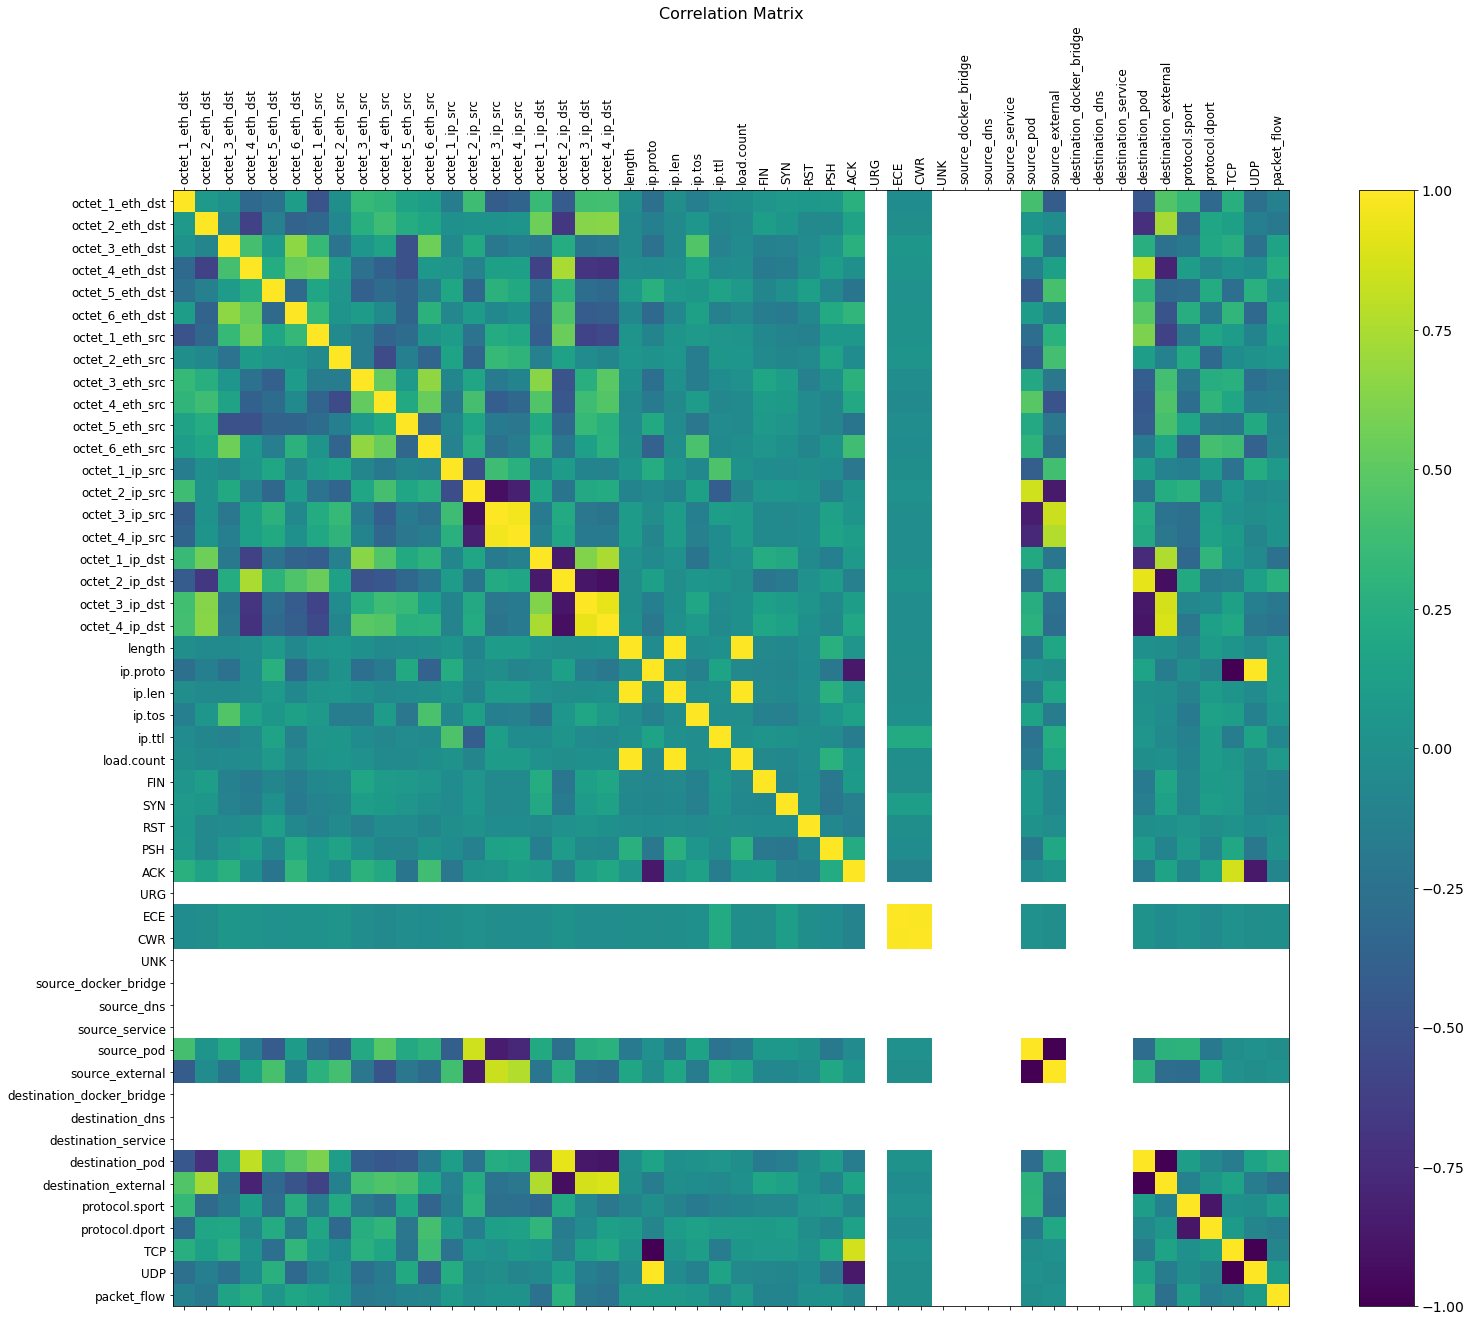

In [55]:
processed_supervised = processed_supervised.drop('class', axis = 1)
f = plt.figure(figsize=(25, 20))
plt.matshow(processed_supervised.corr(), fignum=f.number)
plt.xticks(range(processed_supervised.select_dtypes(['number']).shape[1]), processed_supervised.select_dtypes(['number']).columns, fontsize=12, rotation=90)
plt.yticks(range(processed_supervised.select_dtypes(['number']).shape[1]), processed_supervised.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.savefig('correlation.png')

In [58]:
set(normal_df['ip.dst'])

{'10.240.0.4',
 '10.244.0.1',
 '10.244.0.10',
 '10.244.0.11',
 '10.244.0.14',
 '10.244.0.15',
 '10.244.0.2',
 '10.244.0.3',
 '10.244.0.4',
 '10.244.0.5',
 '10.244.0.6',
 '10.244.0.7',
 '10.244.0.9',
 '13.69.106.211',
 '13.69.106.212',
 '13.69.106.215',
 '13.69.106.88',
 '13.69.106.89',
 '13.69.114.0',
 '13.69.65.27',
 '13.69.65.29',
 '13.69.65.31',
 '13.69.67.61',
 '168.63.129.16',
 '172.104.131.24',
 '192.241.213.181',
 '198.143.164.251',
 '198.143.164.252',
 '198.143.164.254',
 '20.126.199.164',
 '20.50.65.82',
 '23.251.102.74',
 '40.113.176.128',
 '52.236.186.216',
 '52.236.186.217',
 '52.236.186.218',
 '66.240.205.34',
 '89.100.107.147',
 '89.100.107.148'}